<a href="https://colab.research.google.com/github/Billypeng1231/107-2-Multimedia/blob/master/Keras_Mnist_MLP_h1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
#將「輸入層」與「隱藏層」加入模型

model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [6]:
#將「輸出層」加入模型
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10, batch_size=200,verbose=2)

W0614 14:49:51.945401 140678179796864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 14:49:51.976906 140678179796864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0614 14:49:52.075983 140678179796864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 14:49:52.129055 140678179796864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.2908 - acc: 0.9164 - val_loss: 0.1485 - val_acc: 0.9588
Epoch 2/10
 - 7s - loss: 0.1164 - acc: 0.9664 - val_loss: 0.1054 - val_acc: 0.9693
Epoch 3/10
 - 7s - loss: 0.0751 - acc: 0.9785 - val_loss: 0.0901 - val_acc: 0.9740
Epoch 4/10
 - 7s - loss: 0.0517 - acc: 0.9851 - val_loss: 0.0896 - val_acc: 0.9738
Epoch 5/10
 - 7s - loss: 0.0361 - acc: 0.9900 - val_loss: 0.0762 - val_acc: 0.9764
Epoch 6/10
 - 7s - loss: 0.0250 - acc: 0.9938 - val_loss: 0.0753 - val_acc: 0.9780
Epoch 7/10
 - 7s - loss: 0.0186 - acc: 0.9957 - val_loss: 0.0745 - val_acc: 0.9787
Epoch 8/10
 - 7s - loss: 0.0131 - acc: 0.9973 - val_loss: 0.0709 - val_acc: 0.9799
Epoch 9/10
 - 7s - loss: 0.0085 - acc: 0.9989 - val_loss: 0.0717 - val_acc: 0.9802
Epoch 10/10
 - 7s - loss: 0.0063 - acc: 0.9992 - val_loss: 0.0677 - val_acc: 0.9818


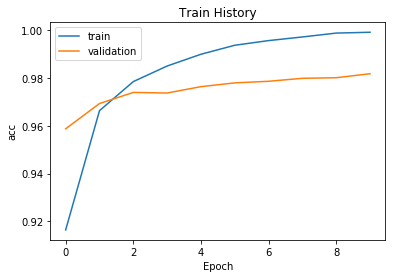

In [8]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')

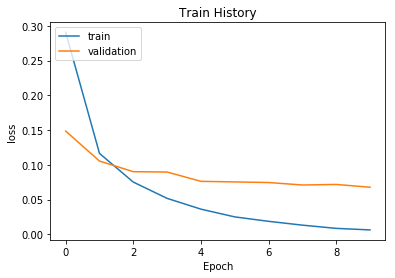

In [9]:
show_train_history(train_history,'loss','val_loss')

In [10]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 113us/step

accuracy= 0.9815


In [11]:
prediction = model.predict_classes(x_Test)

prediction

array([7, 2, 1, ..., 4, 5, 6])

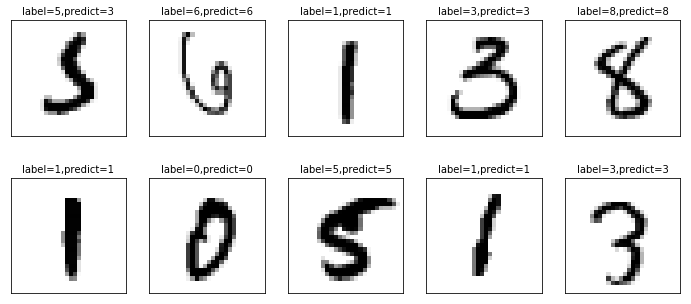

In [14]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)
        
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
    
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

In [15]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,2,1,1,0,1,1,3,0
1,0,1126,2,2,0,1,2,1,1,0
2,2,1,1011,6,1,0,2,5,4,0
3,2,0,1,997,0,2,0,3,3,2
4,1,2,4,0,964,0,3,1,1,6
5,3,0,0,16,1,863,3,0,4,2
6,5,3,0,1,4,5,940,0,0,0
7,1,5,6,3,0,0,0,1008,3,2
8,2,0,4,9,2,1,2,3,950,1


In [16]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [17]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


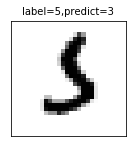

In [18]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

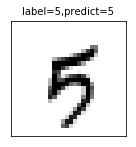

In [19]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)